In [1]:
import pandas_datareader as pdr
key="10fe6784ec51c030901cbe2c84629a98d0c14efb"

In [2]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

D:\anaconda\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df

close      high     low     open    volume  \
symbol date                                                                     
TSLA   2017-06-13 00:00:00+00:00  375.95  376.0000  366.61  367.620  11693404   
       2017-06-14 00:00:00+00:00  380.66  384.2500  376.31  381.085  12731997   
       2017-06-15 00:00:00+00:00  375.34  375.4600  366.49  372.500  10371559   
       2017-06-16 00:00:00+00:00  371.40  378.0100  370.10  377.975   6259666   
       2017-06-19 00:00:00+00:00  369.80  376.7000  367.80  375.000   6392331   
...                                  ...       ...     ...      ...       ...   
       2022-06-06 00:00:00+00:00  714.84  734.6000  703.05  733.060  28068174   
       2022-06-07 00:00:00+00:00  716.66  719.9900  690.28  702.000  24269534   
       2022-06-08 00:00:00+00:00  725.60  749.8900  717.53  720.260  25403540   
       2022-06-09 00:00:00+00:00  719.12  766.6399  717.98  748.020  32163769   
       2022-06-10 00:00:00+00:00  696.69  718.5000  683.74  705.470  32696966   

                                  adjClose   adjHigh   adjLow  adjOpen  \
symbol date                                                              
TSLA   2017-06-13 00:00:00+00:00    75.190   75.2000   73.322   73.524   
       2017-06-14 00:00:00+00:00    76.132   76.8500   75.262   76.217   
       2017-06-15 00:00:00+00:00    75.068   75.0920   73.298   74.500   
       2017-06-16 00:00:00+00:00    74.280   75.6020   74.020   75.595   
       2017-06-19 00:00:00+00:00    73.960   75.3400   73.560   75.000   
...                                    ...       ...      ...      ...   
       2022-06-06 00:00:00+00:00   714.840  734.6000  703.050  733.060   
       2022-06-07 00:00:00+00:00   716.660  719.9900  690.280  702.000   
       2022-06-08 00:00:00+00:00   725.600  749.8900  717.530  720.260   
       2022-06-09 00:00:00+00:00   719.120  766.6399  717.980  748.020   
       2022-06-10 00:00:00+00:00   696.690  718.5000  683.740  705.470   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
TSLA   2017-06-13 00:00:00+00:00   58467020      0.0          1.0  
       2017-06-14 00:00:00+00:00   63659985      0.0          1.0  
       2017-06-15 00:00:00+00:00   51857795      0.0          1.0  
       2017-06-16 00:00:00+00:00   31298330      0.0          1.0  
       2017-06-19 00:00:00+00:00   31961655      0.0          1.0  
...                                     ...      ...          ...  
       2022-06-06 00:00:00+00:00   28068174      0.0          1.0  
       2022-06-07 00:00:00+00:00   24269534      0.0          1.0  
       2022-06-08 00:00:00+00:00   25403540      0.0          1.0  
       2022-06-09 00:00:00+00:00   32163769      0.0          1.0  
       2022-06-10 00:00:00+00:00   32696966      0.0          1.0  

[1259 rows x 12 columns]

In [4]:
df1=df.reset_index()['close']

In [5]:
df1

0       375.95
1       380.66
2       375.34
3       371.40
4       369.80
         ...  
1254    714.84
1255    716.66
1256    725.60
1257    719.12
1258    696.69
Name: close, Length: 1259, dtype: float64

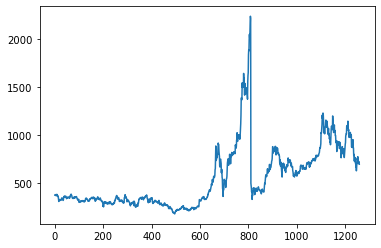

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)
print(df1.shape)

[[0.09563157]
 [0.09791822]
 [0.09533542]
 ...
 [0.26538271]
 [0.26223674]
 [0.25134723]]
(1259, 1)


In [8]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [9]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print(X_test.shape), print(y_test.shape)
print(X_train.shape), print(y_train.shape)

(420, 20)
(420,)
(797, 20)
(797,)


(None, None)

In [11]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [12]:
print(X_test.shape), print(y_test.shape)
print(X_train.shape), print(y_train.shape)

(420, 20, 1)
(420,)
(797, 20, 1)
(797,)


(None, None)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 20, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=0)

In [16]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

14/14 [==============================] - 0s 5ms/step


In [17]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [18]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

529.5403136281321

In [19]:
math.sqrt(mean_squared_error(y_test,test_predict))

794.382832252763

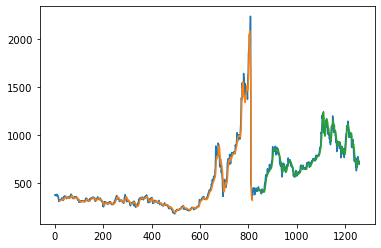

In [20]:

look_back=20
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [21]:
len(test_data)

441

In [22]:
x_input=test_data[421:].reshape(1,-1)
x_input.shape

(1, 20)

In [23]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [24]:
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.2586582]
21
1 day input [0.26478556 0.28286516 0.25771684 0.2575275  0.23542806 0.24076843
 0.21807669 0.23295206 0.25670703 0.28190389 0.28123877 0.27255338
 0.28936585 0.25467768 0.26015885 0.26104244 0.26538271 0.26223674
 0.25134723 0.2586582 ]
1 day output [[0.25555977]]
2 day input [0.28286516 0.25771684 0.2575275  0.23542806 0.24076843 0.21807669
 0.23295206 0.25670703 0.28190389 0.28123877 0.27255338 0.28936585
 0.25467768 0.26015885 0.26104244 0.26538271 0.26223674 0.25134723
 0.2586582  0.25555977]
2 day output [[0.25341046]]
3 day input [0.25771684 0.2575275  0.23542806 0.24076843 0.21807669 0.23295206
 0.25670703 0.28190389 0.28123877 0.27255338 0.28936585 0.25467768
 0.26015885 0.26104244 0.26538271 0.26223674 0.25134723 0.2586582
 0.25555977 0.25341046]
3 day output [[0.251821]]
4 day input [0.2575275  0.23542806 0.24076843 0.21807669 0.23295206 0.25670703
 0.28190389 0.28123877 0.27255338 0.28936585 0.25467768 0.26015885
 0.26104244 0.26538271 0.26223674 0.25134723 0.

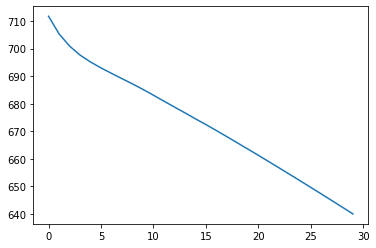

In [26]:
plt.plot(scaler.inverse_transform(lst_output))

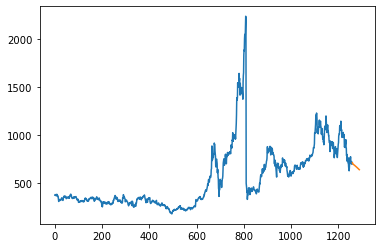

In [32]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(np.arange(1260,1290),scaler.inverse_transform(lst_output))